In [2]:
from cltk.corpus.utils.importer import CorpusImporter
corpus_importer = CorpusImporter('latin')

corpus_importer.list_corpora

['latin_text_perseus',
 'latin_treebank_perseus',
 'latin_text_latin_library',
 'phi5',
 'phi7',
 'latin_proper_names_cltk',
 'latin_models_cltk',
 'latin_pos_lemmata_cltk',
 'latin_treebank_index_thomisticus',
 'latin_lexica_perseus',
 'latin_training_set_sentence_cltk',
 'latin_word2vec_cltk',
 'latin_text_antique_digiliblt',
 'latin_text_corpus_grammaticorum_latinorum',
 'latin_text_poeti_ditalia',
 'latin_text_tesserae']

In [63]:
from collections import Counter
import matplotlib.pyplot as plt
import networkx as nx

In [35]:
from cltk.lemmatize.latin.backoff import BackoffLatinLemmatizer

In [7]:
corpus_importer.import_corpus('latin_text_perseus')

In [9]:
corpus_importer.import_corpus('latin_models_cltk')

In [10]:
from cltk.corpus.readers import get_corpus_reader
reader = get_corpus_reader(language='latin', corpus_name='latin_text_perseus')
docs = list(reader.docs())
len(docs)

293

In [16]:
for doc in docs:
    print (doc['originalTitle'])

Rerum Gestarum
Apologia
Florida
Metamorphoses
Bissula
Caesares
Commemoratio Professorum Burdigalensium
De Herediolo
Eclogarum Liber
Ephemeris
Epicedion in Patrem
Epigrammaton Liber
Epistulae
Epitaphia
Genethliacon ad Ausonium Nepotem
Gratiarum Actio
Griphus Ternarii Numeri
Liber Protrepticus ad Nepotem
Mosella
Oratio Versibus Rhopalicis
Ordo Urbium Nobilium
Parentalia
Praefatiunculae
Precationes
Technopaegnion
Versus Paschales Prosodic
De consolatione philosophiae
De Fide Catholica
Liber De Persona et Duabus Naturis Contra Eutychen Et Nestorium
Quomodo Substantiae in Eo Quod Sint Bonae Sint Cum Non Sint Substanialia Bona
Quomodo Trinitas Unus Deus Ac Non Tres Dii (De Trinitate)
Utrum Pater Et Filius Ac Spiritus Sanctus De Divinitate Substantialiter Praedicentur Liber
Gallic War
De Medicina
Academica
Orationes de Lege Agraria
Brutus
De Amicitia
De Divinatione
De Fato
de Finibus Bonorum et Malorum
De Inventione
de Natura Deorum
De Officiis
De Optimo Genere Oratorum
De Republica
De Senect

In [17]:
from cltk.tag.pos import POSTag

In [37]:
lemmatizer = BackoffLatinLemmatizer()
lemmatizer.lemmatize(['omnis'])

[('omnis', 'omnis')]

In [18]:
docs[5]

{'meta': 'poem-line',
 'author': 'ausonius, decimus magnus.',
 'text': {'0': {'0': 'Caesareos proceres, in quorum regna secundis',
   '1': 'consulibus dudum Romana potentia cessit,',
   '2': 'accipe bis senos, sua quemque monosticha signant,',
   '3': 'quorum per plenam senem Suetonius olim',
   '4': 'nomina, res gestas vitamque obitumque peregit. '},
  '1': {'0': 'PRIMUS regalem patefecit Iulius aulam',
   '1': 'Caesar et Augusto nomen transcripsit et arcem,',
   '2': 'privignus post hunc regnat Nero Claudius, a quo',
   '3': 'Caesar, cognomen caligae cui castra dederunt.',
   '4': 'Claudius hinc potitur regno, post quem Nero saevus, \n ',
   '5': 'ultimus Aeneadum, post hunc tres, nec tribus annis:',
   '6': 'Galba senex, frustra socio confisus inerti;',
   '7': 'mollis Otho, infami per luxum degener aevo',
   '8': 'nec regno dignus nec morte Vitellius ut vir.',
   '9': 'his decimus fatoque accitus Vespasianus ',
   '10': 'et Titus imperii felix brevitate, secutus',
   '11': 'frater,

In [96]:
sents = list(reader.sents())
len(sents)

351364

In [97]:
tagger = POSTag('latin')
lemmatizer = BackoffLatinLemmatizer()
adjs = Counter()
pairs_next = {}
pairs_pre = {}
take_next = False
a = ''
p = ''
for sent in sents[:10000]:
    for w, t in tagger.tag_ngram_123_backoff(sent):
        l = lemmatizer.lemmatize([w])[0][1]
        if t and take_next:
            if t[0] != 'U':
                if a in pairs_next:
                    if l in pairs_next[a]:
                        pairs_next[a][l]+=1
                    else:
                        pairs_next[a][l]=1  
                else:
                    pairs_next[a] = {l:1}
            take_next = False
        if t and t[0] == 'A':
            adjs[l] += 1
            take_next = True
            a = l
            if p:
                if a in pairs_pre:
                    if p in pairs_pre[a]:
                        pairs_pre[a][p]+=1
                    else:
                        pairs_pre[a][p]=1  
                else:
                    pairs_pre[a] = {p:1}
        if t and t[0] != 'U':
            p = l
            
adjs = dict( sorted(adjs.items(), key=lambda item: item[1], reverse=True))

In [126]:
list(adjs.items())[:15]

[('omnis', 1019),
 ('suus', 995),
 ('meus', 642),
 ('multus', 567),
 ('alius', 558),
 ('nullus', 384),
 ('magnus', 362),
 ('noster', 356),
 ('tuus', 356),
 ('unus', 319),
 ('bonus', 214),
 ('totus', 211),
 ('primus', 210),
 ('tantus', 178),
 ('cunctus', 153)]

In [99]:
pairs_pre

{'alius': {'procella': 1,
  'in': 24,
  'pars': 5,
  'cura': 1,
  'possum': 5,
  'super': 5,
  'ut': 10,
  'interdum': 1,
  'alter': 2,
  'pario': 1,
  'inter': 25,
  'exsilium': 1,
  'similis': 3,
  'remedium': 1,
  'ante': 12,
  'quam': 4,
  'illecebra': 1,
  'ex': 9,
  'non': 4,
  'quisquam': 3,
  'qui': 9,
  'et': 61,
  'omitto': 1,
  'praeter': 7,
  'ad': 13,
  'sine': 1,
  'neque': 8,
  'longus': 4,
  'adeo': 1,
  'is': 6,
  'appello': 1,
  'sed': 4,
  'exordior': 1,
  'hinc': 1,
  'etiam': 3,
  'dux': 1,
  'dies': 2,
  'proprius': 1,
  'civitas': 5,
  'flumen': 1,
  'arbor': 2,
  'altitudo': 1,
  'cum2': 6,
  'quidam': 9,
  'vario': 1,
  'magis': 1,
  'vel': 3,
  'singuli': 1,
  'fortis': 1,
  'forsitan': 1,
  'revoco': 1,
  'complures': 5,
  'fortitudo': 1,
  'praesidium': 1,
  'nobilis': 1,
  'iter': 3,
  'mens': 1,
  'ita': 1,
  'vox': 1,
  'hic': 9,
  'sum': 13,
  'insigne': 1,
  'pronus': 1,
  'obscurus': 1,
  'sex': 1,
  'quisque': 1,
  'quo': 1,
  'miles': 4,
  'alius': 9

In [100]:
pairs_next

{'alius': {'res': 2,
  'quoque': 9,
  'bonus': 1,
  'super': 4,
  'littera': 2,
  'quam': 9,
  'ab': 3,
  'non': 7,
  'satis': 1,
  'patria': 1,
  'ad': 10,
  'ita': 2,
  'patior': 1,
  'oppidum': 1,
  'multus': 12,
  'municipium': 1,
  'verber': 1,
  'clades': 1,
  'opto': 1,
  'vita': 2,
  'corpus': 1,
  'condo': 1,
  'vetustus': 1,
  'iter': 1,
  'spiritus': 1,
  'postridie': 1,
  'evenio': 1,
  'virtus': 1,
  'nomen': 4,
  'multitudo': 2,
  'concipio': 1,
  'iubeo': 1,
  'subinde': 1,
  'lego': 1,
  'ex': 6,
  'haud': 1,
  'metus': 4,
  'turba': 1,
  'pars': 3,
  'accedo': 3,
  'mitto': 3,
  'dico': 2,
  'metuo': 1,
  'de': 3,
  'post': 4,
  'magnus': 1,
  'gens': 3,
  'diligentia': 1,
  'navo': 1,
  'gravis': 1,
  'mille': 1,
  'facio': 3,
  'et': 14,
  'ut': 3,
  'iudico': 1,
  'alius': 4,
  'anteeo': 1,
  'nex': 1,
  'horreo': 1,
  'per': 7,
  'invidia': 1,
  'is': 3,
  'duo': 3,
  'via': 1,
  'sum': 14,
  'similis': 2,
  'deinde': 1,
  'malus': 1,
  'qui': 8,
  'uxor': 1,
  'pr

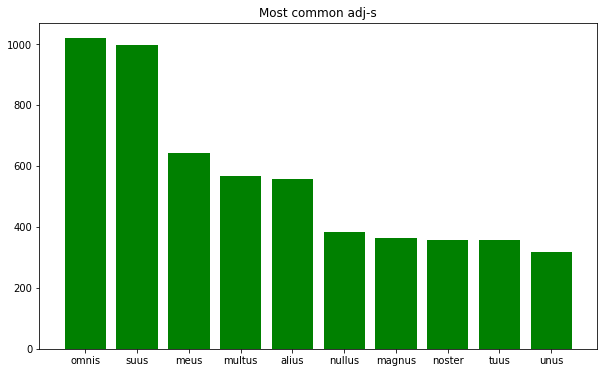

In [101]:
X = []
Y = []
labels = []
i = 0
for a, c in adjs.items():
    i+=1
    X.append(i)
    Y.append(c)
    labels.append(a)
    if i == 10:
        break
plt.figure(figsize=(10,6))        
plt.bar(X, Y, color='green')
plt.xticks(ticks=X, labels=labels)
plt.title('Most common adj-s')
plt.show()

In [195]:
def draw_graph(words_list, pairs, title):
    G = nx.Graph()
    for word in words_list:
        i = 0
        for k, c in sorted(pairs[word].items(), key=lambda item: item[1], reverse=True):
            i += 1
            G.add_edge(word, k, weight=c/5)
            if i>10:
                break
                
    weights = nx.get_edge_attributes(G,'weight').values() 
    color_map = []
    node_size = []
    for node in G:
        if node in words_list:
            color_map.append('yellow')
            node_size.append(7000)
        else: 
            color_map.append('lightgrey')
            node_size.append(5000)
    plt.figure(figsize=(20, 15))
    pos = nx.spring_layout(G)
    nx.draw(G, pos, node_color=color_map, with_labels=False, node_size=node_size, width=list(weights))
    
        # у графов много разных раскладок, выбирайте по своему вкусу
    
    
    # рисуем вершины 
    #nx.draw_networkx_nodes(G, pos, node_size=(3000), node_color='yellow')
    # рисуем популярные свзяи
    #nx.draw_networkx_edges(G, pos, width=list(weights))
    # рисуем менее популярные свзяи
    #nx.draw_networkx_edges(G, pos, edgelist=esmall, width=4, alpha=0.5, edge_color='b', style='dashed')
    # подписи
    nx.draw_networkx_labels(G, pos, font_size=20, font_family='sans-serif')
    
    
    #nx.draw(G, pos,
    #edge_color=colors,
    #width=list(weights),
    #with_labels=True,
    #node_color='yellow')
    
    plt.title(title, fontdict = {'fontsize' : 30})
    plt.axis('off')
    plt.show()


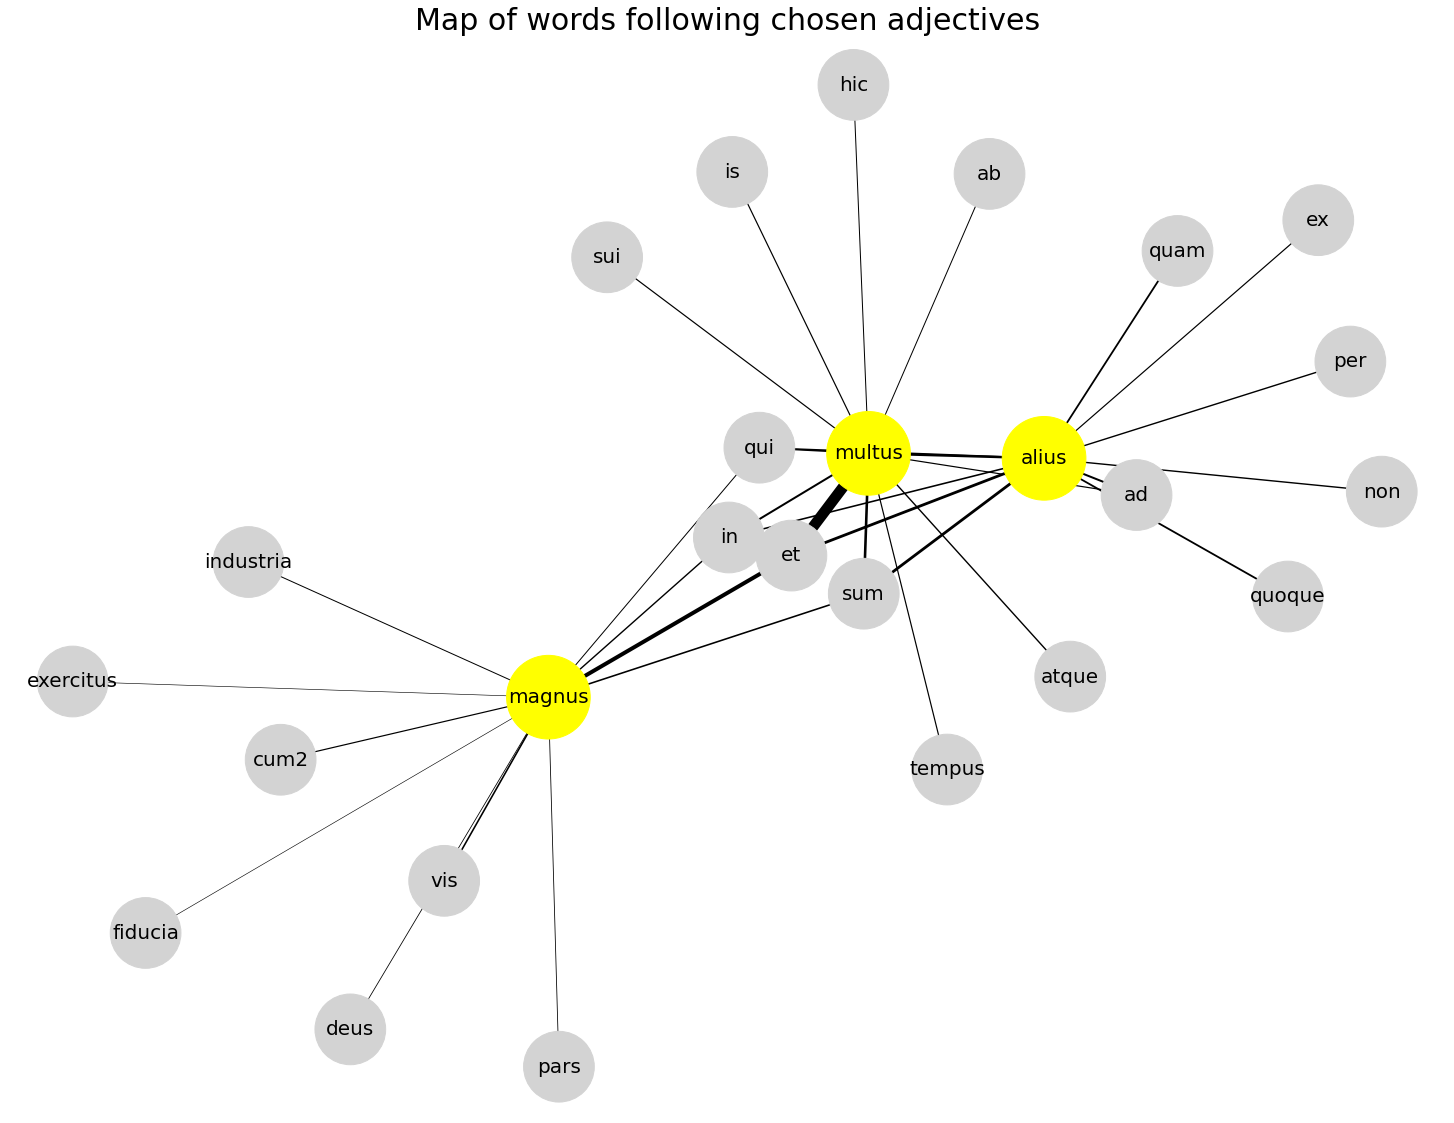

In [199]:
words = ['multus', 'alius', 'magnus']
draw_graph(words, pairs_next, "Map of words following chosen adjectives")

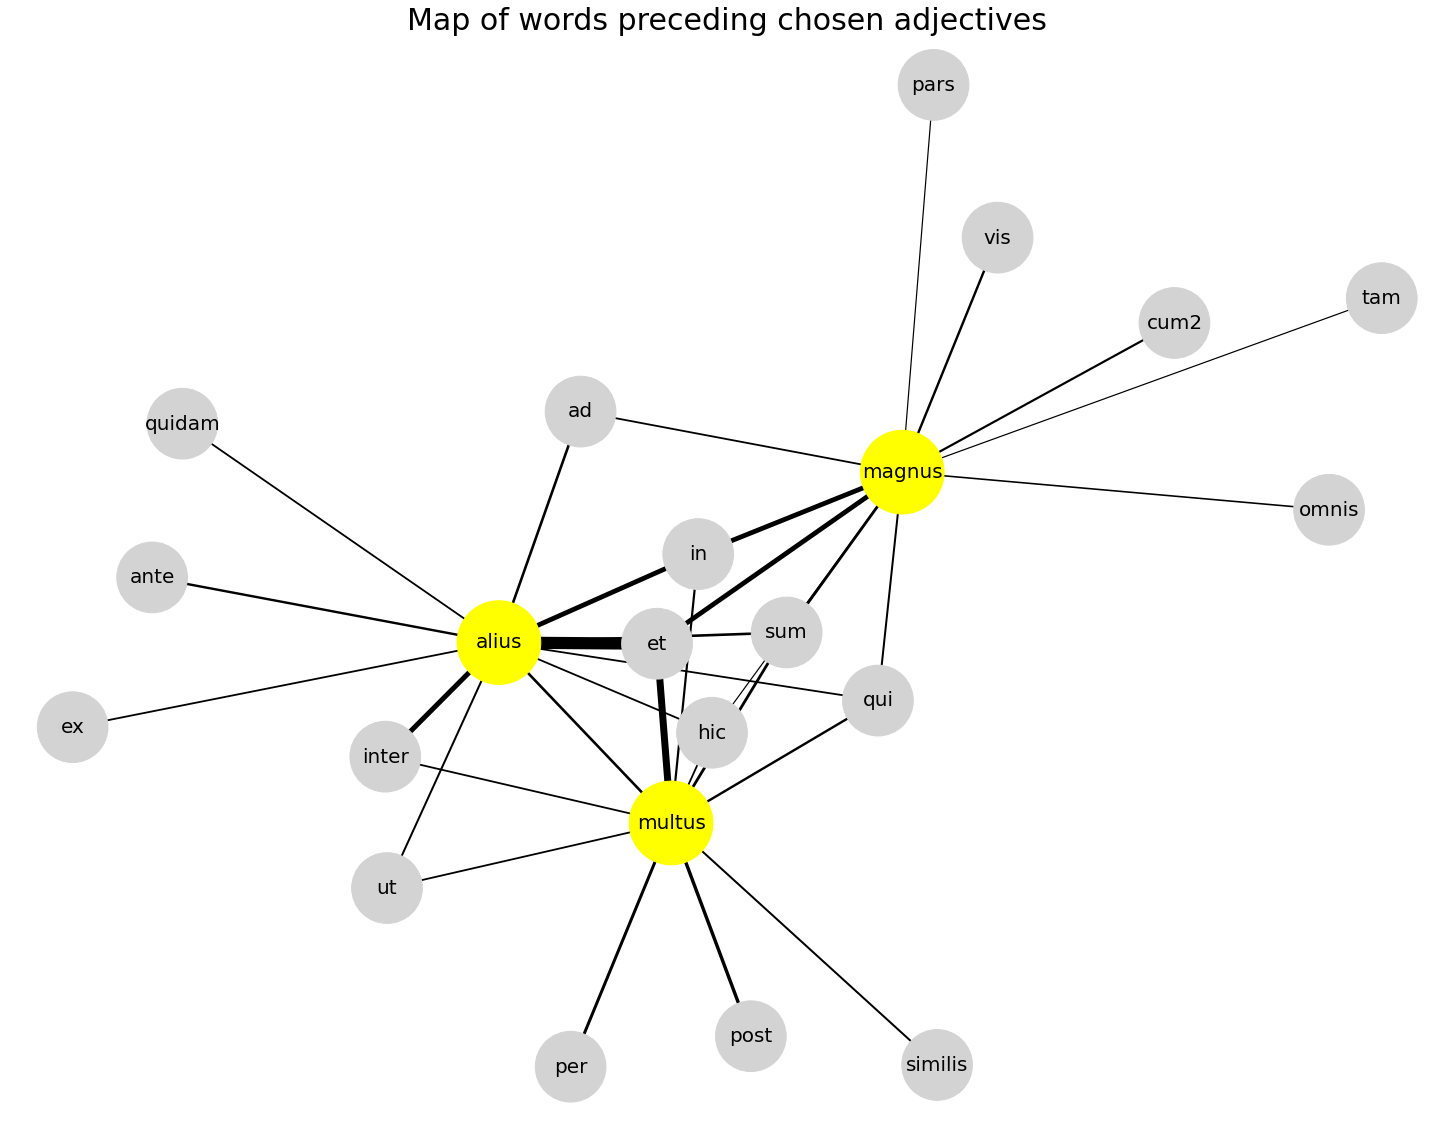

In [198]:
draw_graph(words, pairs_pre, "Map of words preceding chosen adjectives")